## Цель исследования
Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

### Дополнительные вопросы исследования
1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

***
## 1. Загрузка и обработка данных

In [60]:
import pandas as pd
import numpy as np

from scipy import stats
from statsmodels import stats as sms

import category_encoders as ce
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook")
sns.set_palette("Set2")

In [61]:
data = pd.read_csv('data/ds_salaries.csv', index_col=0)
display(data.head())
display(data.info())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


None

In [62]:
print('Number of duplicates: {}'.format(data[data.duplicated()].shape[0]))
data = data.drop_duplicates()
print('Table size after deleting duplicates: {}'.format(data.shape))

Number of duplicates: 42
Table size after deleting duplicates: (565, 11)


In [63]:
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,5.650000e+02,565,565.000000,565,565.000000,565,565
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,243,546,130,NaN,359,NaN,295,NaN,318,290
mean,2021.364602,NaN,NaN,NaN,3.381160e+05,NaN,110610.343363,NaN,69.911504,NaN,NaN
std,0.698138,NaN,NaN,NaN,1.599879e+06,NaN,72280.702792,NaN,40.900666,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,6.700000e+04,NaN,60757.000000,NaN,50.000000,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,1.109250e+05,NaN,100000.000000,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.000000,NaN,NaN


In [64]:
'''
Поскольку у нас уже есть salary в USD и информация о валюте, в которой специалисту платили зарплату, то сама зарплата в местной валюте нам неважна - дропнем этот признак
'''
data = data.drop(['salary'], axis=1)

### Выводы
#### Пропуски, дупликаты, типы данных
- 0 пропусков
- 42 дупликата, все удалены
- Все числовые и категориальные признаки представлены корректными типами данных - на этапе EDA мы преобразуем категориальные признаки в более удобный для анализа формат
#### Неинформативные признаки
- Поскольку у нас уже есть salary в USD и информация о валюте, в которой специалисту платили зарплату, то сама зарплата в местной валюте нам неважна - дропнули этот признак
#### Классификация признаков
**Числовые признаки:**
- ```salary_in_usd```

**Категориальные признаки:**
- ```work_year```
- ```experience_level```
- ```employment_type```
- ```job_title```
- ```salary_currency```
- ```employee_residence```
- ```remote_ratio```
- ```company_location```
- ```company_size```
#### Выводы по основным статистическим характеристикам признаков:
```work_year```
- представленные данные о зарплатах датируются 2020-2022 годами

```experience_level```
- большинство специалистов (243) работали на Senior-level с потенциалом стать Expert'ами

```employment_type```
- в 546 из 565 случаях специалисты работали full-time

```job_title```
- Data Scientst - самый распростроненный job title (130 совпадений)

```salary_currency```
-  359 из 565 специалистов получали зарплату в USD

```salary_in_usd```
- $110,610.34 - средняя зарплата
- $100,000.00 - медианная зарплата (не так далеко от средней - сигнал о том, что распределение признака может быть близким к нормальному)

```employee_residence```
- в основном, специалисты из выборки являлись резидентами США (295 совпадений)

```remote_ratio```
- по медиане, средний сотрудник работал на полностью удаленной работе

```company_location```
- большинство компаний, на которых работали специалисты, располагались в США (318 совпадений)

```company_size```
- большинство компаний были среднего размера, от 50 до 250 сотрудников (290 совпадений)

***
## 2. EDA

### 2.1. Визуальный анализ данных
#### Числовые признаки

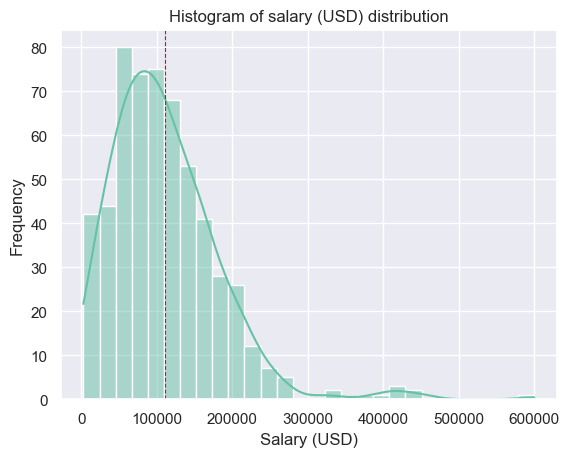

In [65]:
# hist for salary in USD
ax = sns.histplot(data['salary_in_usd'], kde=True)
ax.set(xlabel='Salary (USD)', ylabel='Frequency')
ax.axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
plt.title('Histogram of salary (USD) distribution')

plt.show()

В основном, величина зарплаты в USD сконцентрирована в диапазоне до $28,000. Распределение признака похоже на log-нормальное.

**ВОПРОC: Можно ли обращаться с log-нормальным распределением как с нормальным? Или как с ним лучше быть при анализе гипотез?**

#### Категориальные признаки

In [66]:
from ydata_profiling import ProfileReport

# converting the text attribute into category
data['employee_residence'] = data['employee_residence'].astype('category')
ProfileReport(data, title="Salary data profiling report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Выводы

- С увеличением года в выборке возрастает число наблюдений (всего 3 года: 2020, 2021, 2022);

- Senior-level/Expert лидируют в категории типа трудоустройства (243 совпадения), тогда как Executive-level/Director являются самыми редкими представителями выборки. Это может быть связано с тем, что данные о зарплатах Executive+ уровней находятся под NDA или же не афишируются за ненадобностью таких специалистов в поиске работы через платформы;

- 546 из 565 членов выборки работали full-time;

- В выборке находятся 50 различных ролей, преимущественно Data Scientists (130) и Data Engineers (121);

- В большинстве случаев (359) локальной валютой являлся USD. Всего 17 валют. О корреляции этого признака с другим(и) и о корреляции других признаков поговорим чуть позже;

- Большинство сотрудников (295) являются резидентами США, а сама выборка насчитывает 57 резиденств, так что признак резиденства помечен как признак с большой мощностью;

- В основном (346), сотрудники работали на полной удаленке;

- Большинство членов выборки (318) работает в компаниях, базирующихся на территории США. Мы посмотрим на корреляцию этого признака с признаком резиденства сотрудника чуть позже;

- Большинство компаний, представлекнных в выборке (290), имеют средний размер (от 50 до 250 сотрудников).

#### Влияние признаков на зарплату Data Scientist'ов

In [67]:
# creating dataframe copy, filtering only Data Scientist records as per the research objective
data_copy = data[data['job_title'] == 'Data Scientist']
data_copy = data_copy.drop(['job_title'], axis=1)

'''
1. Replacing infrequent values in attributes with high cardinality with Other
'''

# takes a column and number of largest vals and returns the same column with vals below n-largest as 'Other'
def replace_infrequent_vals(col: pd.Series, n: int) -> pd.Series:
    top_n = col.value_counts().nlargest(n).index
    col = col.astype('category').cat.add_categories(['Other'])
    col = col.where(col.isin(top_n), other='Other')
    return col

data_copy.loc[:, 'salary_currency'] = replace_infrequent_vals(col=data_copy['salary_currency'], n=5)
data_copy.loc[:, 'employee_residence'] = replace_infrequent_vals(col=data_copy['employee_residence'], n=10)
data_copy.loc[:, 'company_location'] = replace_infrequent_vals(col=data_copy['company_location'], n=10)

'''
2. Coding categorical attributes, except year
'''
# Experience level
ord_encoder = ce.OrdinalEncoder(mapping=[{
    'col': 'experience_level',
    'mapping': {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
}])
data_encoded = ord_encoder.fit_transform(data_copy[['experience_level']])
data_copy = pd.concat([data_copy, data_encoded], axis=1)

# Company size
ord_encoder = ce.OrdinalEncoder(mapping=[{
    'col': 'company_size',
    'mapping': {'S': 1, 'M': 2, 'L': 3}
}])
data_encoded = ord_encoder.fit_transform(data_copy[['company_size']])
data_copy = pd.concat([data_copy, data_encoded], axis=1)

# Other categorical attributes
bin_encoder = ce.BinaryEncoder(cols=['employment_type', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location'])
data_bin = bin_encoder.fit_transform(data_copy[['employment_type', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location']])
data_copy = pd.concat([data_copy, data_bin], axis=1)

data_copy = data_copy.drop(['employment_type', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location'], axis=1)

'''
3. Normalizing salary
'''
r_scaler = preprocessing.RobustScaler()
data_copy['salary_in_usd'] = r_scaler.fit_transform(data_copy[['salary_in_usd']])

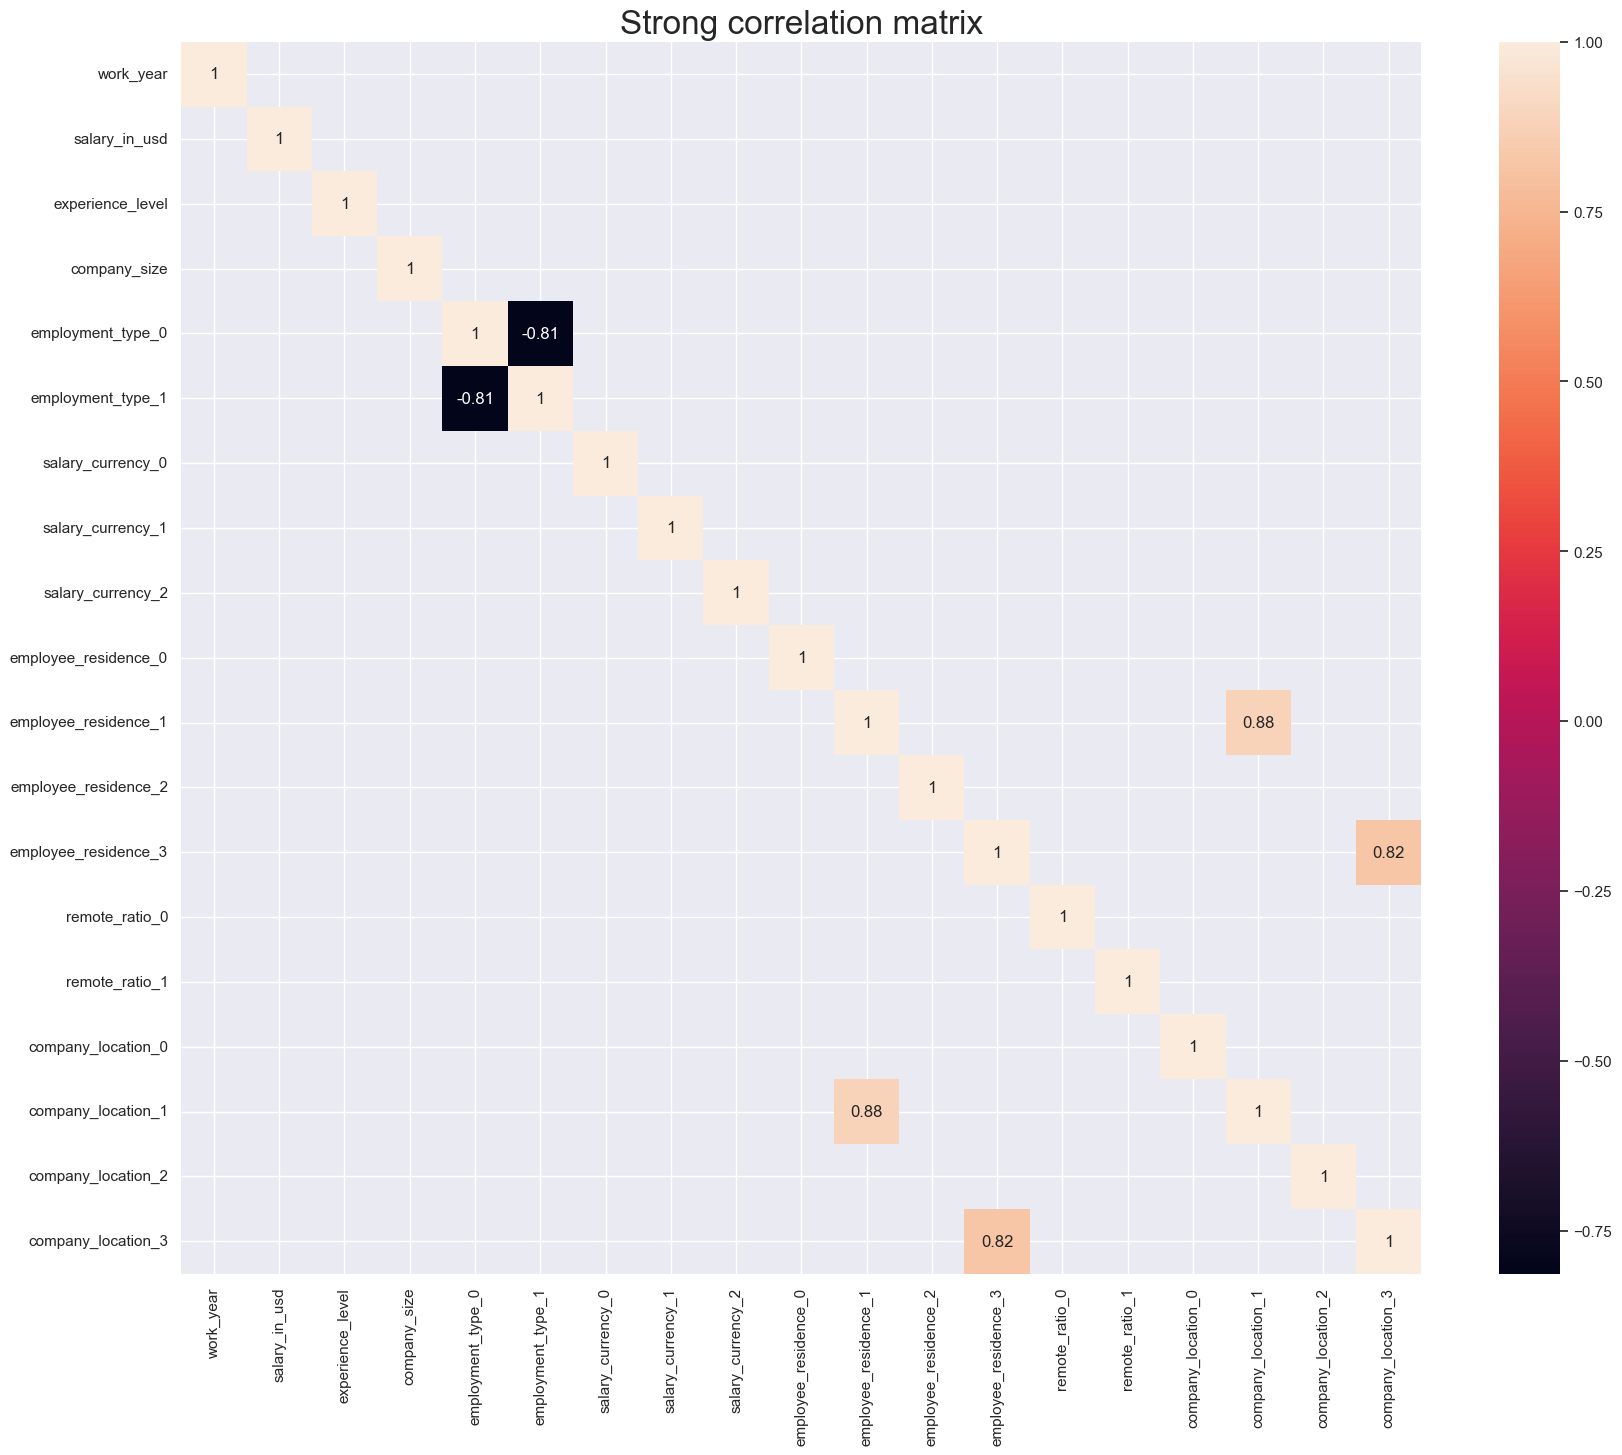

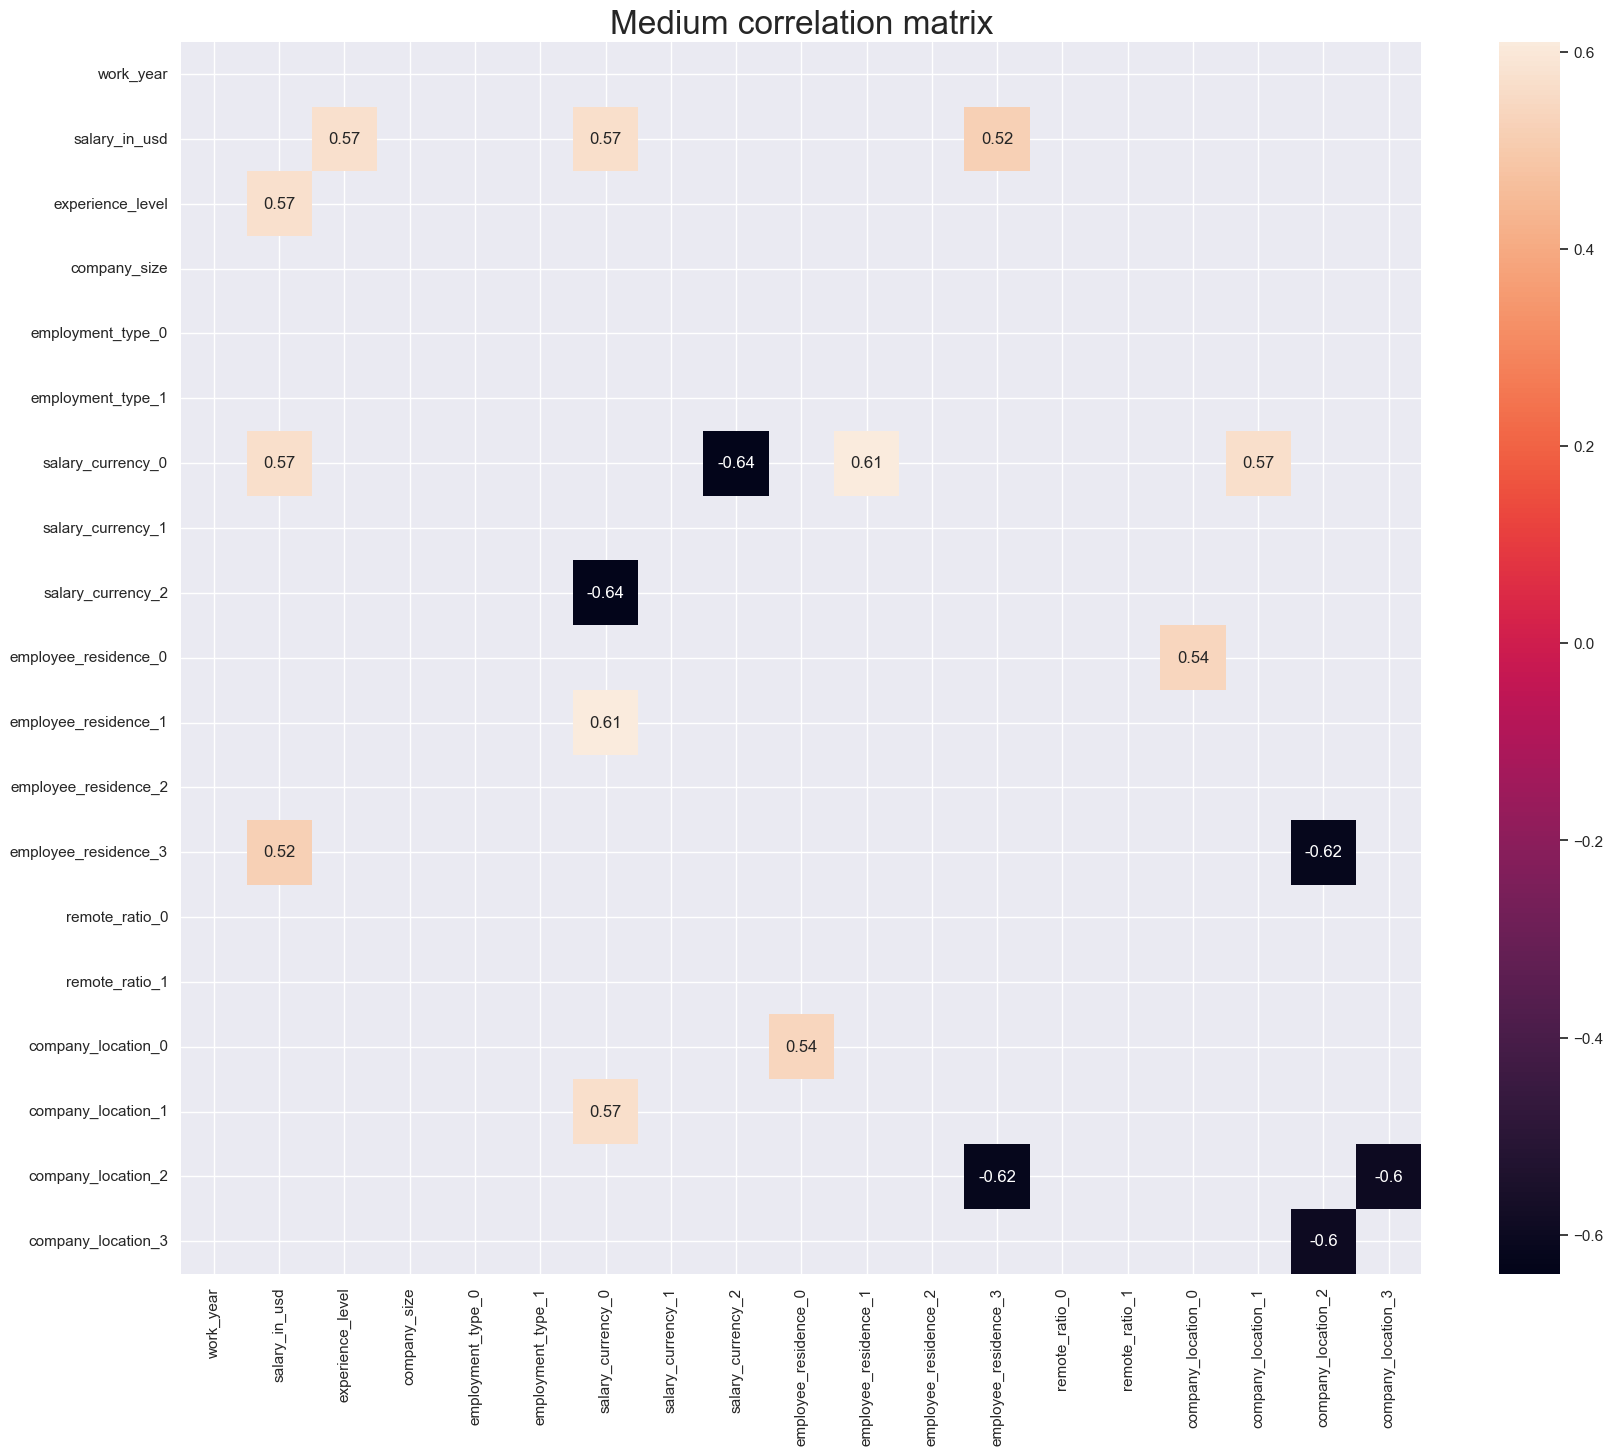

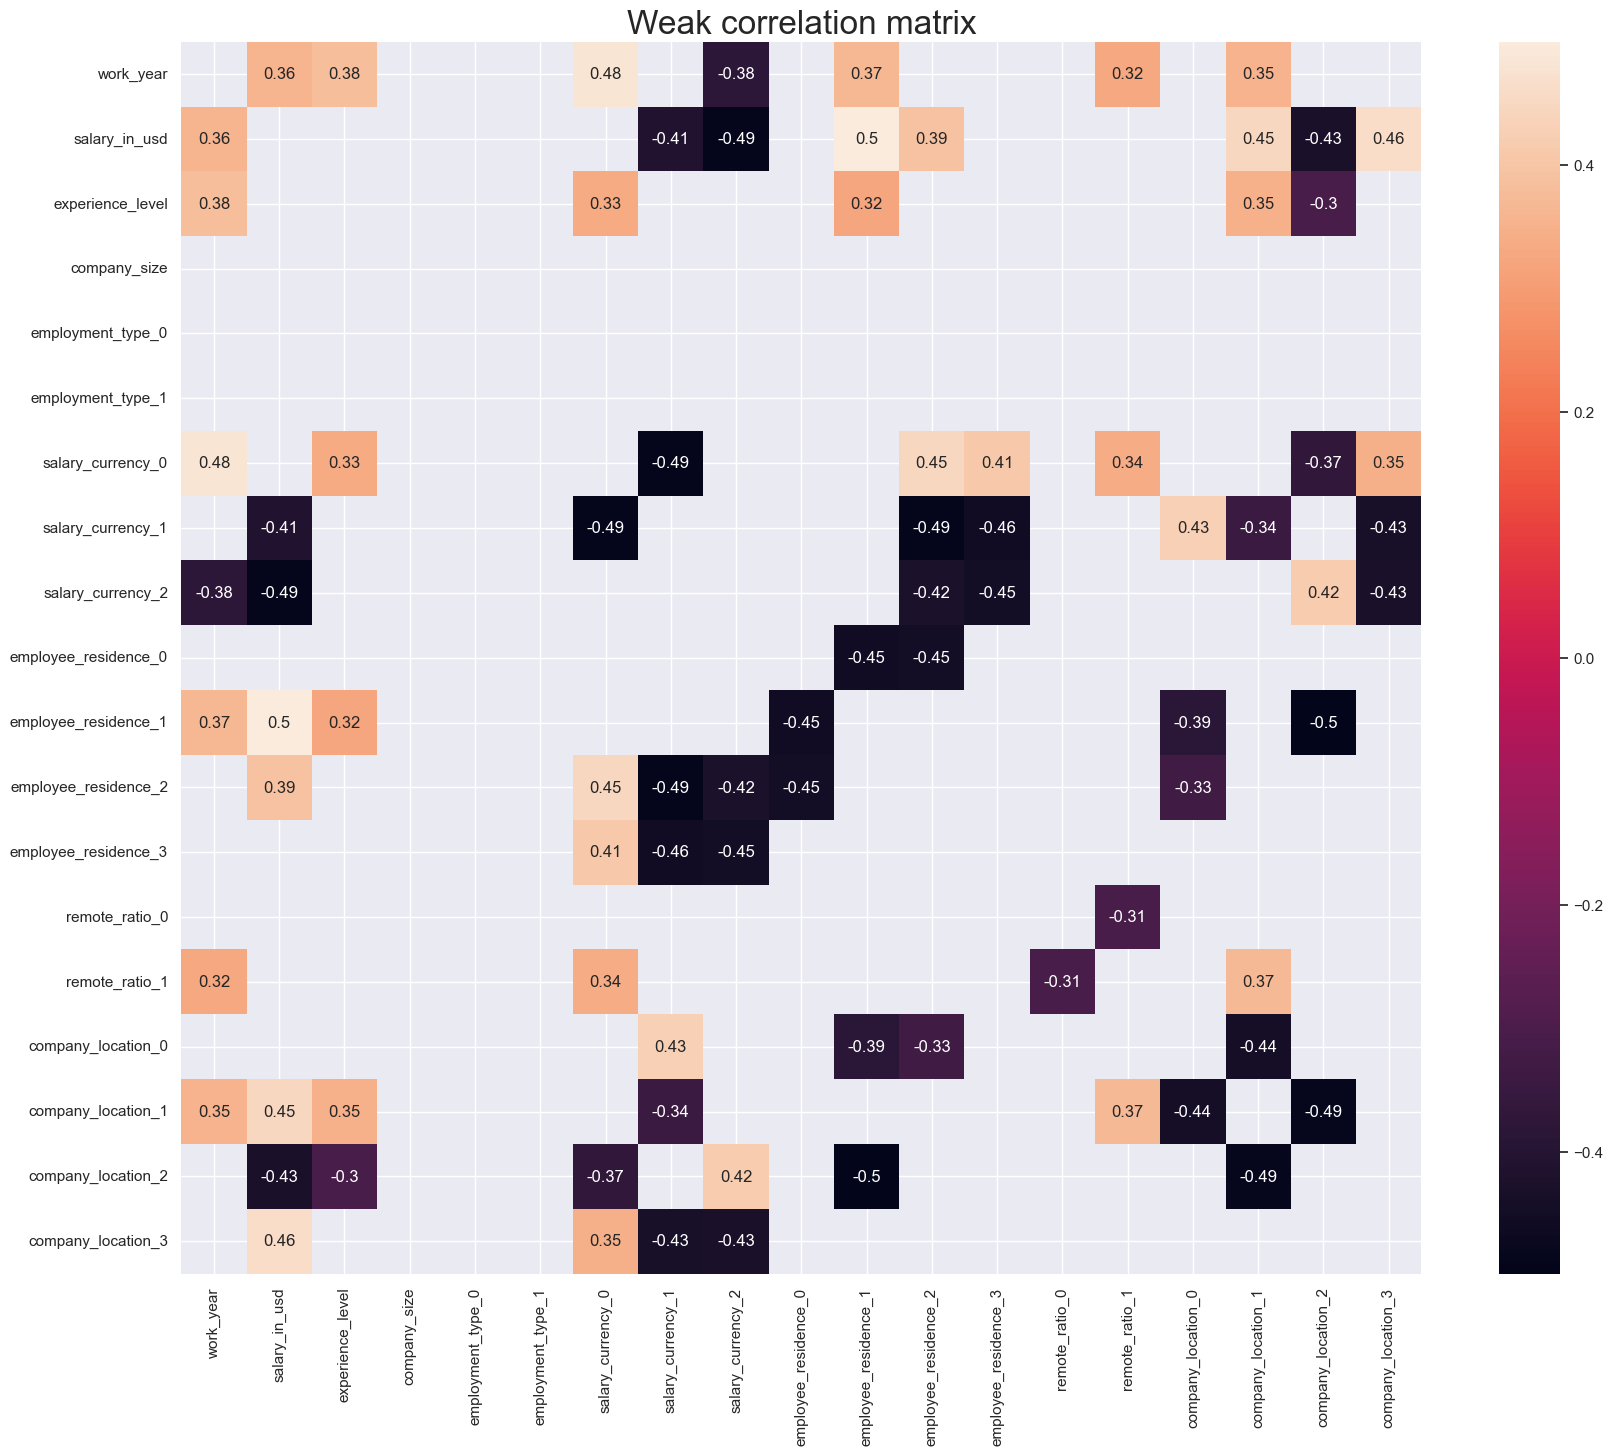

In [68]:
'''
4. Building correlation matrices
'''
corr_matrix = data_copy.corr(numeric_only=True)

# takes corr matrix, tresholds for correlation score and correlation magnitude (e.g. strong, medium, weak)
def draw_corr_matrix(base_matrix: pd.DataFrame, lower_threshold: float, upper_threshold: float,  magnitude: str):
    filtered_matrix = base_matrix[((base_matrix >= lower_threshold) & (base_matrix < upper_threshold)) | ((base_matrix < -lower_threshold) & (base_matrix > -upper_threshold))]
    plt.figure(figsize=(20, 16))
    plt.title(f'{magnitude} correlation matrix', fontsize=24)
    sns.heatmap(filtered_matrix, annot=True)

# Strong correlation
draw_corr_matrix(corr_matrix, 0.7, 1.01, 'Strong')
# Medium correlation
draw_corr_matrix(corr_matrix, 0.5, 0.7, 'Medium')
# Weak correlation
draw_corr_matrix(corr_matrix, 0.3, 0.5, 'Weak')

In [69]:
# dropping company location columns because they highly correlate with employee residence
data_copy = data_copy.drop(['company_location_0', 'company_location_1', 'company_location_2', 'company_location_3'], axis=1)

### Выводы
Среднее влияение на зарплату Data Scientist'а (от +- 0.5 до +- 0.7):
- Опыт специалиста (```experience_level```)
- Валюта, в которой специалист получает зарплату (```salary_currency```)
- Резиденство специалиста (```employee_residence```)

Слабое влияние на зарплату Data Scientist'а (от +- 0.3 до +- 0.5):
- Год наблюдения (```work_year```)
- Локация компании (```company_location```)

Однако поскольку мы удалили локацию компании из-за сильной корреляции с резиденством, признак локации компании больше нерелевантен.

***
### 2.2. Статистический анализ данных
#### 2.2.1. Статистические тесты для проверки корреляций
Были выявлены следедующие корреляции для признака зарплаты (```salary_in_usd```)
- Чем больше опыт, тем выше зарплата (0.48)
- Зарплата меняется в зависимости от валюты, в которой ее выплачивают (разные коэффициенты корреляции для разных бинарных признаков валюты (после binary encoding))
- Зарплата меняется в зависимости от резиденства специалиста (разные коэффициенты корреляции для разных бинарных признаков резиденства (после binary encoding))
- С течением времени зарплата Data Scientist'а увеличивалась (0.36)
    - **Важно!** Поскольку анализ зарплаты в зависимости от года подразумевается одним из ключевых бизнес вопросов, мы выполним его отдельно (п. 2.2.2) от проверок вышеупомянутых корреляций.

##### Опыт VS зарплата (в USD)
**Шаг 1: Проверяем, меняется ли зарплата в зависимости от опыта**

- H0: Зарплата одинакова для всех уровней опыта
- H1: Зарплата неодинакова для всех уровней опыта

In [70]:
# will be testing all hypotheses at 0.05 significance level
alpha = 0.05

# function to define distribution normality
def decision_normality(p):
    print(f'p-value: {round(p, 3)}')
    if p <= alpha:
        print(f'p-значение меньше, чем заданный уровень значимости {alpha}. Распределение отлично от нормального.')
    else:
        print(f'p-значение больше, чем заданный уровень значимости {alpha}. Распределение является нормальным.')
    
# function to accept / reject H0
def decision_hypothesis(p):
    print(f'p-value: {round(p, 3)}')
    if p <= alpha:
        print(f'p-значение меньше, чем заданный уровень значимости {alpha}. Отвергаем нулевую гипотезу в пользу альтернативной.')
    else:
        print(f'p-значение больше, чем заданный уровень значимости {alpha}. У нас нет оснований отвергнуть нулевую гипотезу.')
        

In [71]:
# double-checking salary (USD) distribution
_, p = stats.shapiro(data['salary_in_usd'])
decision_normality(p)

# testing with kruskal because 3+ groups with non-normal distribution
juniors = data[data['experience_level'] == 'EN']['salary_in_usd']
middles = data[data['experience_level'] == 'MI']['salary_in_usd']
seniors = data[data['experience_level'] == 'SE']['salary_in_usd']
executives = data[data['experience_level'] == 'EX']['salary_in_usd']

_, p = stats.kruskal(juniors, middles, seniors, executives)
decision_hypothesis(p)

p-value: 0.0
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
p-value: 0.0
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:** зарплата меняется в зависимости от опыта работы.

**Шаг 2: Проверяем, растет ли зарплата с ростом уровня опыта**

Теперь необходимом попарно сравнить уровни опыта по возрастанию, чтобы проверить, повышается ли зарплата с ростом уровня опыта работы.

Для каждой итерации у нас будут следующие гипотезы:
- H0: медианная зарплата данного уровня опыта больше или равна медианной зарплате следующего по рангу уровня опыта
- H1: медианная зарплата данного уровня опыта меньше медианной зарплаты следующего по рангу уровня опыта

In [72]:
# using Mann-Whitney due to 2 independent groups of a non-normally distributed attribute
_, p = stats.mannwhitneyu(middles, juniors, alternative='greater')
decision_hypothesis(p)

_, p = stats.mannwhitneyu(seniors, middles, alternative='greater')
decision_hypothesis(p)

_, p = stats.mannwhitneyu(executives, seniors, alternative='greater')
decision_hypothesis(p)

p-value: 0.0
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
p-value: 0.0
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
p-value: 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:** для каждого парного теста H0 была отвергнута. Это значит, что с ростом уровня опыта растет зарплата.

##### Валюта VS зарплата (в USD)
- H0: Распределение зарплаты одинаково для разных валют
- H1: Распределение зарплаты неодинаково для разных валют

In [73]:
# leaving only top-10 currencies, the rest renamed as 'Other'
data['salary_currency'] = replace_infrequent_vals(col=data['salary_currency'], n=10)
currencies = list(data['salary_currency'].unique())

# creating a dict where key is currency and value is the list of salaries found for this currencies
currencies_salaries = dict()
for cur in currencies:
    salaries = np.array(data[data['salary_currency'] == cur]['salary_in_usd'])
    currencies_salaries[cur] = salaries
    
# testing with kruskal because 3+ groups with non-normal distribution
_, p = stats.kruskal(*currencies_salaries.values())
decision_hypothesis(p)

p-value: 0.0
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:** зарплата в USD эквиваленте меняется в зависимости от валюты, в которой она выплачивается.

##### Резиденство VS зарплата (в USD)
- H0: Расрпделение зарплаты одинаково для разных мест резиденства
- H1: Расрпделение зарплаты неодинаково для разных мест резиденства

In [74]:
# leaving only top-10 residences, the rest renamed as 'Other'
data['employee_residence'] = replace_infrequent_vals(col=data['employee_residence'], n=10)
residences = list(data['employee_residence'].unique())

residences_salaries = dict()
for res in residences:
    salaries = np.array(data[data['employee_residence'] == res]['salary_in_usd'])
    residences_salaries[res] = salaries
    
_, p = stats.kruskal(*residences_salaries.values())
decision_hypothesis(p)

p-value: 0.0
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:** зарплата в USD эквиваленте меняется в зависимости от резиденства специалиста.

***
#### 2.2.2. Статистические тесты для ответа на ключевые бизнес-вопросы
1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?**
- H0: Зарплаты Data Scientist'ов уменьшаются или не изменяются от года к году
- H1: Зарплаты Data Scientist'ов увеличиваются от года к году

In [75]:
# Using Mann-Whitney because we'll be analysing a non-normal attribute of 2 independent groups at a time
year_one_salaries = data[data['work_year'] == 2020]['salary_in_usd']
year_two_salaries = data[data['work_year'] == 2021]['salary_in_usd']
year_three_salaries = data[data['work_year'] == 2022]['salary_in_usd']

_, p = stats.mannwhitneyu(year_two_salaries, year_one_salaries, alternative='greater')
decision_hypothesis(p)
_, p = stats.mannwhitneyu(year_three_salaries, year_two_salaries, alternative='greater')
decision_hypothesis(p)

p-value: 0.249
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
p-value: 0.0
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:** мы не можем утверждать, что зарплата росла от года к году, так как p-value проверки гипотезы для первых двух лет равен 0.249 на доверительном интервале в 95%.

**2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?**
- H0: Медианная зарплата Data Scientist'a равна медианной зарплате Data Engineer'a в 2022 году
- H1: Медианная зарплата Data Scientist'a неравна медианной зарплате Data Engineer'a в 2022 году

In [76]:
ds_salary = data[(data['job_title'] == 'Data Scientist') & (data['work_year'] == 2022)]['salary_in_usd']
de_salary = data[(data['job_title'] == 'Data Engineer') & (data['work_year'] == 2022)]['salary_in_usd']

_, p = stats.mannwhitneyu(ds_salary, de_salary)
decision_hypothesis(p)

p-value: 0.319
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:** у нас нет оснований говорить, что зарплаты Data Scientist'ов и  Data Engineer'ов отличались в 2022 году.

**3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?**
- H0: Медианная зарплата Data Scientist'ов в компаниях разных размеров одинакова
- H1: Медианная зарплата Data Scientist'ов в компаниях разных размеров неодинакова

In [77]:
small = data[(data['company_size'] == 'S') & (data['job_title'] == 'Data Scientist')]['salary_in_usd']
medium = data[(data['company_size'] == 'M') & (data['job_title'] == 'Data Scientist')]['salary_in_usd']
large = data[(data['company_size'] == 'L') & (data['job_title'] == 'Data Scientist')]['salary_in_usd']

_, p = stats.kruskal(small, medium, large)
decision_hypothesis(p)

p-value: 0.0
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:** медианная зарплата Data Scientist'а изменяется в зависимости от размера компании.

Теперь проверим, растет ли зарплата специалиста по мере роста размера компании:
- H0: Медианная зарплата Data Scientist'а в компании данного размера больше или равна медианной зарплате Data Scientist'а в компании следующего по рангу размера
- H1:Медианная зарплата Data Scientist'а в компании данного размера меньше медианной зарплаты Data Scientist'а в компании следующего по рангу размера

In [80]:
_, p = stats.mannwhitneyu(medium, small, alternative='greater')
decision_hypothesis(p)

_, p = stats.mannwhitneyu(large, medium, alternative='greater')
decision_hypothesis(p)

_, p = stats.mannwhitneyu(large, small, alternative='greater')
decision_hypothesis(p)

p-value: 0.0
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
p-value: 0.976
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
p-value: 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:** медианная зарплата Data Scientist'а в средних и крупных компаниях больше, чем в маленьких. Однако статистическая значимое отличие медианной зарплаты Data Scientst'а в средних и крупных компаниях отсутствует.

**4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**
- H0: Наличие должностей Data Scientist и Data Engineer не зависит от размера компании
- H1: Наличие должностей Data Scientist и Data Engineer зависит от размера компании

In [79]:
table = pd.crosstab(data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]['job_title'], data['company_size'])
_, p, _, _ = stats.chi2_contingency(table)
decision_hypothesis(p)

p-value: 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:** между наличием должностей Data Scientist и Data Engineer и размером компании есть связь.

***
## Выводы по исследованию
### Цель исследования
Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

**На зарплату специалиста Data Scientist влияют следующие факторы:**
- ***Опыт работы:*** чем больше опыт, тем выше зарплата;
- ***Валюта***, в которой выплачивается зарплата;
- ***Резиденство специалиста.***

### Дополнительные вопросы исследования
**1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?**
- Ежегодного роста зарплат у специалистов Data Scientist не наблюдается.

**2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?**
- Распределение зарплат Data Scientist и Data Engineer в 2022 году не отличались.

**3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?**
- Медианная зарплата Data Scientist'ов в средних и крупных компаниях больше, чем в маленьких;
- Статистически значимая разница между зарплатами Data Scientist'ов в средних и крупных компаниях отсутствует.

**4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**
- Между наличием должностей Data Scientist и Data Engineer и размером компании есть связь